In [1]:
#Importing all libraries
import numpy as np
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# for machine learning
import sklearn
import imblearn

# setting up the size of the figures
plt.rcParams['figure.figsize'] = (16, 5)
# setting up the style of the plot
plt.style.use('fivethirtyeight')


# for ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder




In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
data=pd.read_csv("zomato.csv")

In [4]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

## Removing unwanted columns

In [6]:
data.drop(['url', 'address','phone','listed_in(city)','menu_item','reviews_list','cuisines','dish_liked'], axis=1,inplace=True)

In [7]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,600,Buffet


## Renaming columns

In [8]:
data.rename(columns={'listed_in(type)': 'type_of_meal', 'approx_cost(for two people)': 'cost_per_2head'}, inplace=True)

## Strip off the rate column into float 

In [9]:
data['rate']=data['rate'].str.split('/').str[0]
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cost_per_2head,type_of_meal
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600,Buffet


In [10]:
data['rate'].value_counts()

NEW     2208
3.9     2098
3.8     2022
3.7     2011
3.9     1874
3.8     1851
3.7     1810
3.6     1773
4.0     1609
4.0     1574
3.6     1543
4.1     1474
4.1     1474
3.5     1431
3.5     1353
3.4     1259
3.4     1217
3.3     1168
4.2     1165
3.3     1142
4.2     1019
3.2     1006
4.3      917
3.2      867
3.1      862
4.3      776
3.1      699
4.4      628
3.0      558
4.4      519
3.0      465
2.9      427
4.5      409
2.9      375
2.8      313
2.8      287
4.5      247
4.6      175
2.7      170
2.6      143
2.7      137
4.6      125
2.6      117
4.7       86
4.7       81
-         69
2.5       56
2.5       45
4.8       43
2.4       40
4.9       30
2.4       30
2.3       28
4.9       25
2.3       23
4.8       23
2.2       19
2.1       13
2.1       11
2.2        7
2.0        7
2.0        4
1.8        3
1.8        2
Name: rate, dtype: int64

In [11]:
data = data.dropna()

In [100]:
## dealing the missing values

In [12]:

data_missing = data.isnull().sum()

# lets calculate the percentage of missing values in the dataset
data_missing_percent = ((data.isnull().sum()/data.shape[0])*100).round(2)
missing_data_df = pd.concat([data_missing, data_missing_percent],
                                axis=1, 
                                keys=['missing_count', 'missing_Percent %'],
                                sort = True)

In [13]:
missing_data_df 

,missing_count,missing_Percent %
book_table,0,0.0
cost_per_2head,0,0.0
location,0,0.0
name,0,0.0
online_order,0,0.0
rate,0,0.0
rest_type,0,0.0
type_of_meal,0,0.0
votes,0,0.0


## Removing the unwanted charcaters in cost_per-2head feature

In [14]:
data['cost_per_2head'].value_counts()

300      5715
400      5541
500      4298
200      3518
600      3344
250      2283
800      2202
700      1864
1,000    1562
150      1421
350      1410
450      1265
1,200     979
1,500     947
750       749
650       748
550       715
100       702
900       677
1,300     515
1,100     510
1,400     473
2,000     356
1,600     266
1,700     247
1,800     203
3,000     162
850       162
2,500     146
2,200      78
1,900      70
2,100      67
950        62
2,800      45
4,000      29
3,500      25
2,400      23
1,350      18
180        17
3,400      13
2,300      11
2,600      10
230        10
1,250       9
130         8
40          8
50          6
1,650       6
1,450       5
80          4
199         4
4,100       4
330         4
1,050       4
2,700       3
70          3
3,200       2
6,000       2
4,500       2
240         2
120         2
160         1
360         1
5,000       1
3,700       1
560         1
Name: cost_per_2head, dtype: int64

In [15]:
data['cost_per_2head'] = data['cost_per_2head'].str.replace(',','')

In [16]:
data['cost_per_2head']=data['cost_per_2head'].astype('float')

In [17]:
data['rate'].value_counts()

NEW     2205
3.9     2091
3.7     2008
3.8     1999
3.9     1867
3.8     1820
3.7     1802
3.6     1755
4.0     1598
4.0     1547
3.6     1533
4.1     1471
4.1     1457
3.5     1424
3.5     1340
3.4     1250
3.4     1197
3.3     1155
4.2     1142
3.3     1126
4.2     1013
3.2      997
4.3      911
3.1      851
3.2      849
4.3      772
3.1      699
4.4      627
3.0      544
4.4      519
3.0      447
2.9      427
4.5      409
2.9      374
2.8      302
2.8      278
4.5      247
4.6      175
2.7      167
2.6      140
2.7      136
4.6      125
2.6      109
4.7       86
4.7       81
-         65
2.5       56
2.5       44
4.8       43
2.4       36
4.9       30
2.4       30
2.3       28
4.9       25
2.3       23
4.8       23
2.2       19
2.1       13
2.1       11
2.2        7
2.0        7
2.0        4
1.8        3
1.8        2
Name: rate, dtype: int64

In [18]:
data['rate'] = data['rate'].replace(['NEW'],'0')

In [19]:
data['rate'] = data['rate'].replace(['-'],'0')

In [20]:
data.drop(data.index[data['rate'] == 0], inplace=True)

In [21]:
data['rate']=data['rate'].astype('float')

In [22]:
data.dtypes

name               object
online_order       object
book_table         object
rate              float64
votes               int64
location           object
rest_type          object
cost_per_2head    float64
type_of_meal       object
dtype: object

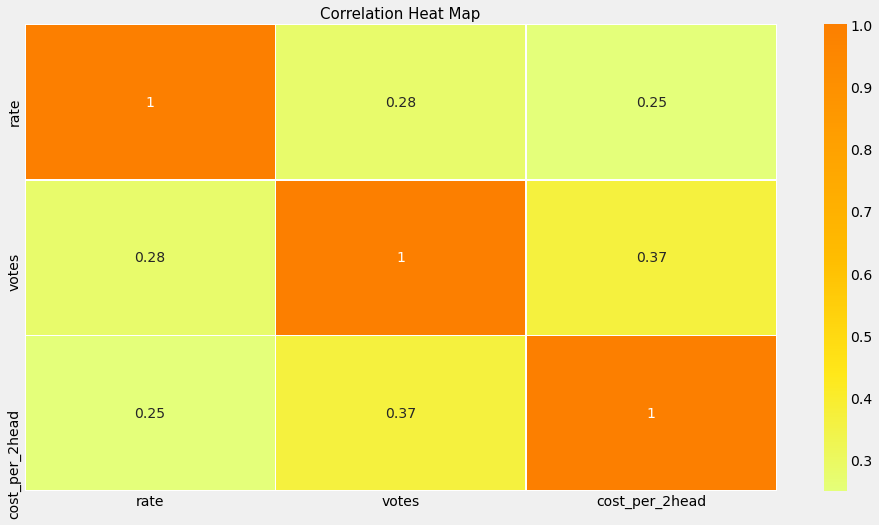

In [23]:
# lets check the Heat Map for the Data with respect to correlation.

plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

Votes and cost_per_2head are correlated to some extent.
Rate has some weak positive correlation to votes and cost_per_2head.

## converting the rate feature into categorical bins

In [24]:
bins = [0,3,4,5]
names = ['Bad','Average','Great']
data['rate'] = pd.cut(data['rate'],bins,labels=names)

## checking our target column is balanced or not

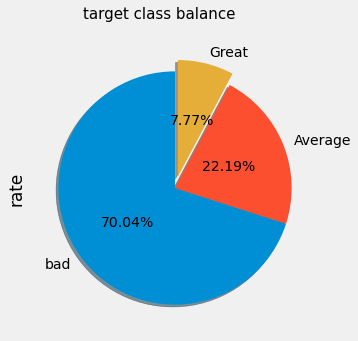

In [25]:

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

#plt.subplot(1, 2, 1)
#sns.countplot(data['rate'],)

#plt.xlabel('rate_labels', fontsize = 10)

#plt.subplot(1, 2, 2)
data['rate'].value_counts().plot(kind = 'pie', explode = [0,0,0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['bad','Average','Great'], shadow = True, pctdistance = 0.5)
#plt.axis('off')

plt.suptitle('target class balance', fontsize = 15)
plt.show()

target class is  imbalanced

## Detect the outliers

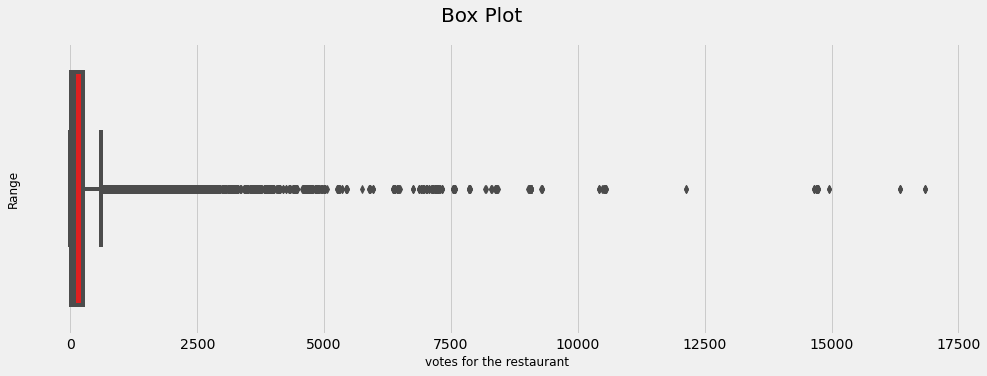

In [26]:
# lets check the boxplots for the columns where we suspect for outliers
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')


#plt.subplot(1, 2, 1)
sns.boxplot(data['votes'], color = 'red')
plt.xlabel('votes for the restaurant', fontsize = 12)
plt.ylabel('Range', fontsize = 12)



plt.suptitle('Box Plot', fontsize = 20)
plt.show()

Text(0, 0.5, 'Range')

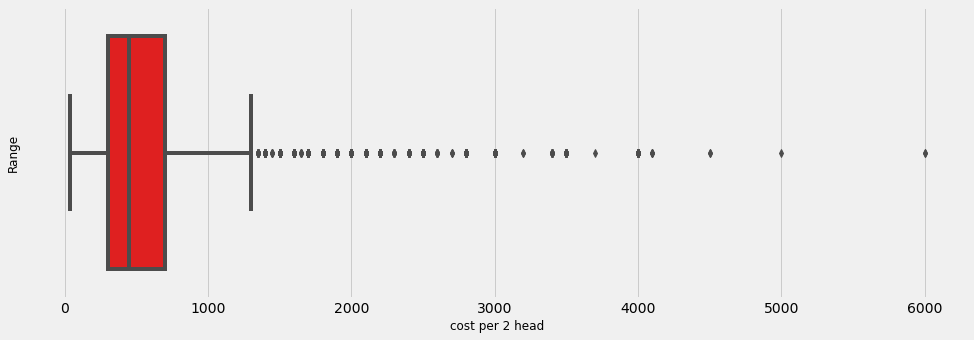

In [27]:

#plt.subplot(1, 2, 2)
sns.boxplot(data['cost_per_2head'], color = 'red')
plt.xlabel('cost per 2 head', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

## capping the outliers

In [28]:
data['votes'].values[data['votes'].values>5000]=5000

In [29]:
data['cost_per_2head'].values[data['cost_per_2head'].values>3000]=3000

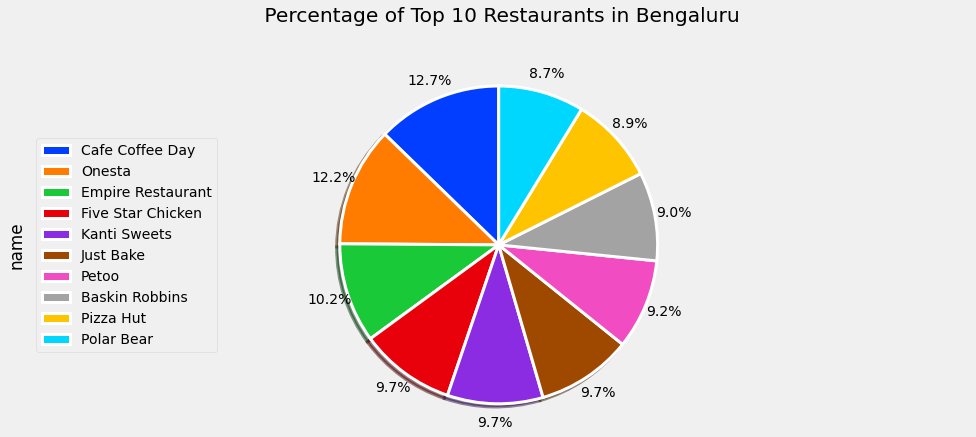

In [30]:
#Frequency of the top 10 restaurants in Bangaluru
colors = sns.color_palette('bright')[0:10]



data["name"].value_counts()[:10].plot(kind='pie',
                                    figsize=(15, 6),
                                    autopct='%1.1f%%', 
                                    startangle=90,    
                                    shadow=True,
                                    labels=None,
                                    pctdistance=1.12,  wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors 
                                    )


        
plt.title(' Percentage of Top 10 Restaurants in Bengaluru',y=1.12) 

plt.axis('equal') 

plt.legend(labels=data["name"].value_counts().index, loc='center left') 



plt.show()

## online order pie chart

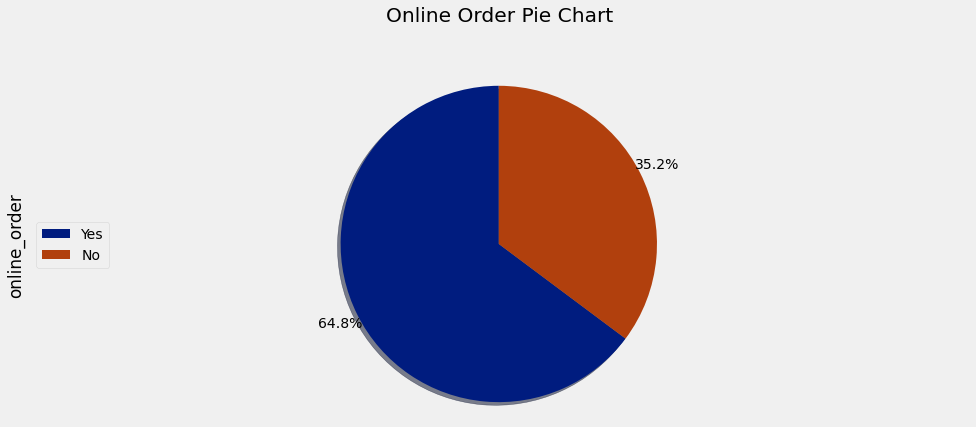

In [31]:
#Online order percentage pie chart

colors = sns.color_palette('dark')[0:10]


data['online_order'].value_counts().plot(kind='pie',
                                      figsize=(15, 6),
                                      autopct='%1.1f%%', 
                                      startangle=90,    
                                      shadow=True,       
                                      labels=None,                 
                                      pctdistance=1.12  ,colors=colors     
                                      ) 

plt.title('Online Order Pie Chart', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=data['online_order'].value_counts().index, loc='center left') 

# show plot
plt.show()


## we can see that 64.8% people take online orders and 35.2% goes to  offline mode

In [32]:
rest = pd.value_counts(data['rest_type'], sort = True)

In [33]:
rest=rest[:20]

## Top twenty restaurant types 

Text(0.5, 0, 'Count')

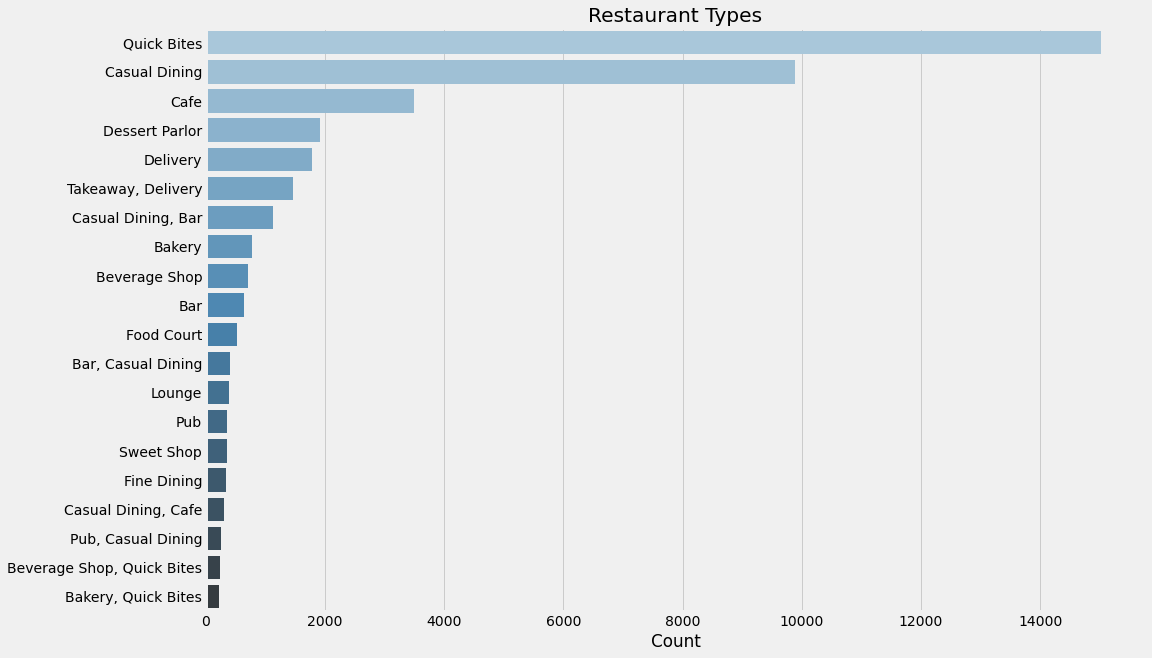

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(rest,rest.index,palette="Blues_d")
plt.title("Restaurant Types")
plt.xlabel("Count")

## book table pie chart

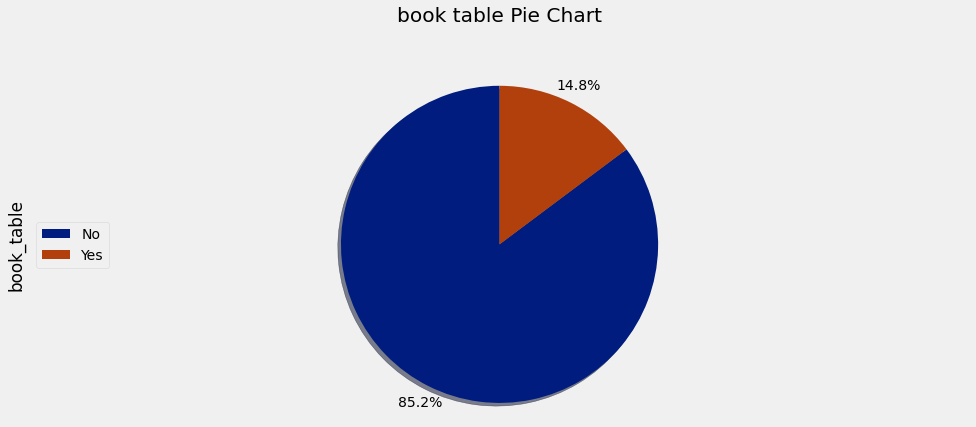

In [35]:
#Online order percentage pie chart

colors = sns.color_palette('dark')[0:10]


data['book_table'].value_counts().plot(kind='pie',
                                      figsize=(15, 6),
                                      autopct='%1.1f%%', 
                                      startangle=90,    
                                      shadow=True,       
                                      labels=None,                 
                                      pctdistance=1.12  ,colors=colors     
                                      ) 

plt.title('book table Pie Chart', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=data['book_table'].value_counts().index, loc='center left') 

# show plot
plt.show()


## change the position of features for columns extracting 

In [38]:
data=data.iloc[:,[0,1,2,4,5,6,7,8,3]]

In [39]:
data.head()

,name,online_order,book_table,votes,location,rest_type,cost_per_2head,type_of_meal,rate
0,Jalsa,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,Great
1,Spice Elephant,Yes,No,787,Banashankari,Casual Dining,800.0,Buffet,Great
2,San Churro Cafe,Yes,No,918,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Average
3,Addhuri Udupi Bhojana,No,No,88,Banashankari,Quick Bites,300.0,Buffet,Average
4,Grand Village,No,No,166,Basavanagudi,Casual Dining,600.0,Buffet,Average


## feature mapping in rate column

In [55]:
data['rate'].value_counts()

Average    28908
Great       9156
Bad         3207
Name: rate, dtype: int64

In [56]:
data.dropna(inplace=True)

In [57]:
data.isnull().any()

name              False
online_order      False
book_table        False
votes             False
location          False
rest_type         False
cost_per_2head    False
type_of_meal      False
rate              False
dtype: bool

In [58]:
data['rate'].value_counts()

Average    28908
Great       9156
Bad         3207
Name: rate, dtype: int64

# feature mapping

In [59]:
data['rate'] = data['rate'].replace(('Great','Average','Bad'),(3,2,1))

In [60]:
data['rate'].value_counts()

2    28908
3     9156
1     3207
Name: rate, dtype: int64

In [61]:
from imblearn.over_sampling import RandomOverSampler
le = LabelEncoder()

In [62]:
data['online_order'] = le.fit_transform(data['online_order'])
data['book_table']=le.fit_transform(data['book_table'])
data['rest_type']=le.fit_transform(data['rest_type'])
data['type_of_meal']=le.fit_transform(data['type_of_meal'])
data['location']=le.fit_transform(data['location'])
data['name']=le.fit_transform(data['name'])

In [63]:
data.head()

,name,online_order,book_table,votes,location,rest_type,cost_per_2head,type_of_meal,rate
0,2777,1,1,775,1,24,800.0,0,3
1,5274,1,0,787,1,24,800.0,0,3
2,4884,1,0,918,1,19,800.0,0,2
3,139,0,0,88,1,73,300.0,0,2
4,2247,0,0,166,4,24,600.0,0,2


## splitting the data

In [64]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [65]:
print("Shape of the x :", X.shape)
print("Shape of the y :", y.shape)

Shape of the x : (41271, 8)
Shape of the y : (41271,)


## using  oversampling method to balance the target feature

In [67]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

x_resample, y_resample  = oversample.fit_resample(X, y.values.ravel())


In [68]:
print(x_resample.shape)
print(y_resample.shape)

(86724, 8)
(86724,)


In [69]:
print("Before Resampling :")
print(y.value_counts())

Before Resampling :
2    28908
3     9156
1     3207
Name: rate, dtype: int64


In [74]:
print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

After Resampling :
1    28908
2    28908
3    28908
Name: 0, dtype: int64


## splitting the data after resampling

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)


print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x test :", x_test.shape)
print("Shape of the y test :", y_test.shape)


Shape of the x Train : (69379, 8)
Shape of the y Train : (69379, 1)
Shape of the x test : (17345, 8)
Shape of the y test : (17345, 1)


## performing standardization

In [80]:


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Using decision tree algorithm to classify the data

In [81]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)



DecisionTreeClassifier()

# Evaluation

In [82]:
y_pred = model.predict(x_test)

In [86]:
y_pred

array([1, 3, 1, ..., 2, 3, 3], dtype=int64)

In [87]:
pd.value_counts(y_pred)

1    5965
3    5744
2    5636
dtype: int64

## confusion matrix

Training Accuracy : 0.9993225615820349
Testing Accuracy : 0.9667339290861919


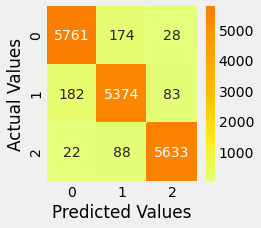

In [84]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [85]:

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.97      0.97      0.97      5963
           2       0.95      0.95      0.95      5639
           3       0.98      0.98      0.98      5743

    accuracy                           0.97     17345
   macro avg       0.97      0.97      0.97     17345
weighted avg       0.97      0.97      0.97     17345



# visualizing decision tree

[Text(0.5, 0.875, 'votes <= -0.125\ngini = 0.667\nsamples = 69379\nvalue = [22945, 23269, 23165]'),
 Text(0.25, 0.625, 'votes <= -0.373\ngini = 0.616\nsamples = 49923\nvalue = [21628, 20850, 7445]'),
 Text(0.125, 0.375, 'votes <= -0.493\ngini = 0.551\nsamples = 35747\nvalue = [17001, 16776, 1970]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'book_table <= 0.833\ngini = 0.662\nsamples = 14176\nvalue = [4627, 4074, 5475]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'votes <= 0.204\ngini = 0.327\nsamples = 19456\nvalue = [1317, 2419, 15720]'),
 Text(0.625, 0.375, 'book_table <= 0.833\ngini = 0.513\nsamples = 7297\nvalue = [1249, 1283, 4765]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'votes <= 1.295\ngini = 0.179\nsamples = 12159\nvalue = [68, 1136, 10955]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  

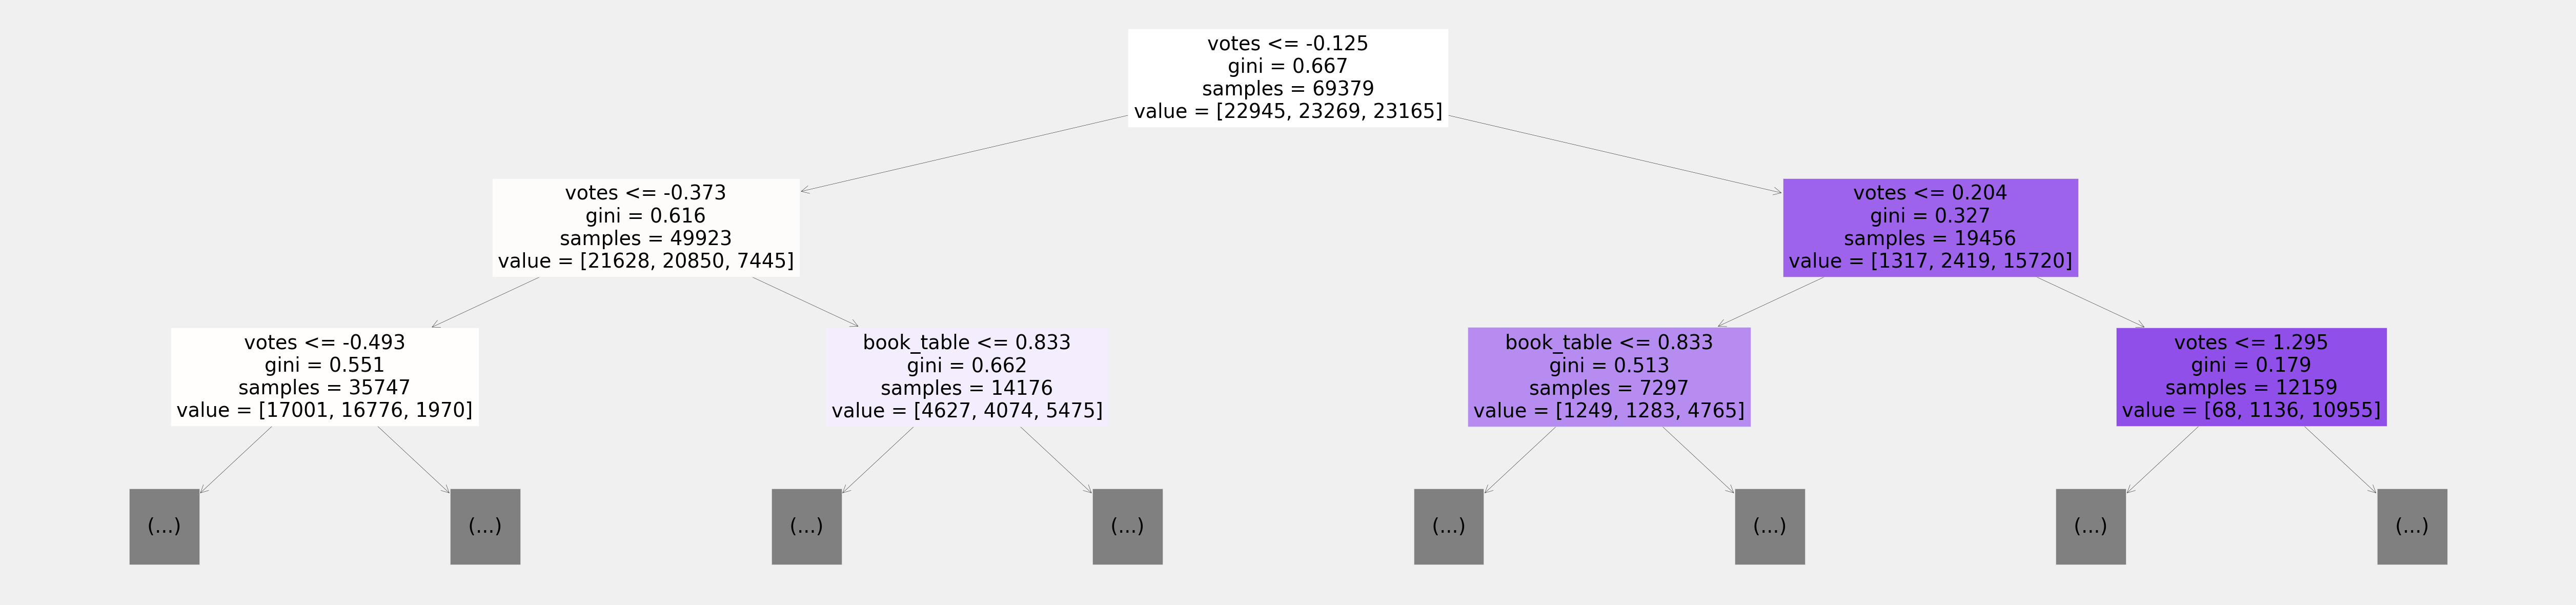

In [93]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X.columns, max_depth=2, filled=True)